## Computing the pitch of a speech frame with the autocorraltion method ##

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.io import wavfile
from scipy.signal import correlate
rcParams['figure.figsize'] = (16, 6)

Text(0.5,1,'sb034.wav')

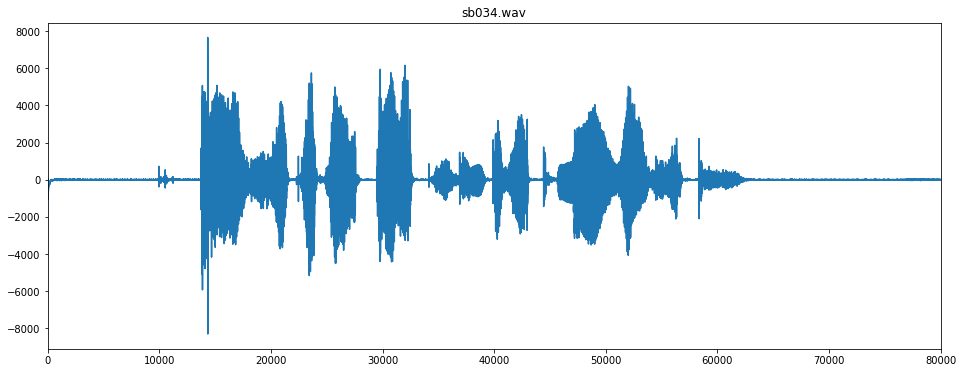

In [3]:
# Read and plot a speech file from the FDA_UE database
name = "sb034.wav"
filename="../data/fda_ue/" + name
sfreq, data = wavfile.read(filename)
plot(data)
xlim(0, len(data))
title(name)

Text(0.5,1,'A time frame')

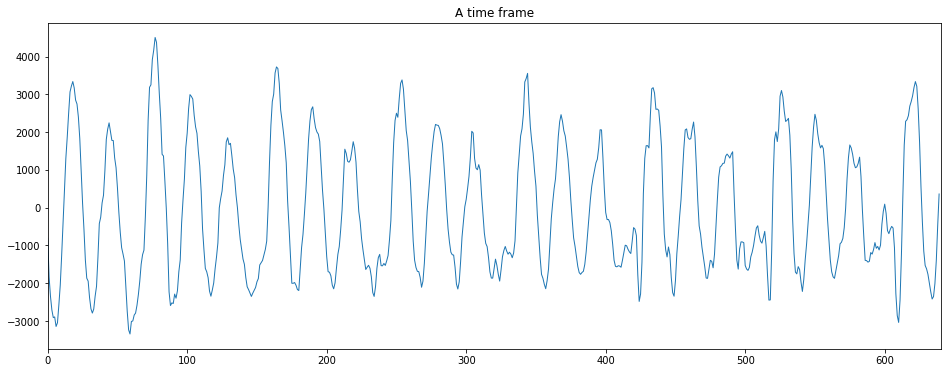

In [4]:
# Pick a short segment
windowlength = 32 # 32ms
ns_windowlength = int(round((windowlength * sfreq) / 1000))
pos = 31000
frame_length = ns_windowlength

frame = data[pos:pos+frame_length]

plot(frame, linewidth=1.0)
xlim(0, frame_length)
title("A frame")

### Calculate the autocorrelation using [scipy.signal.correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) ###

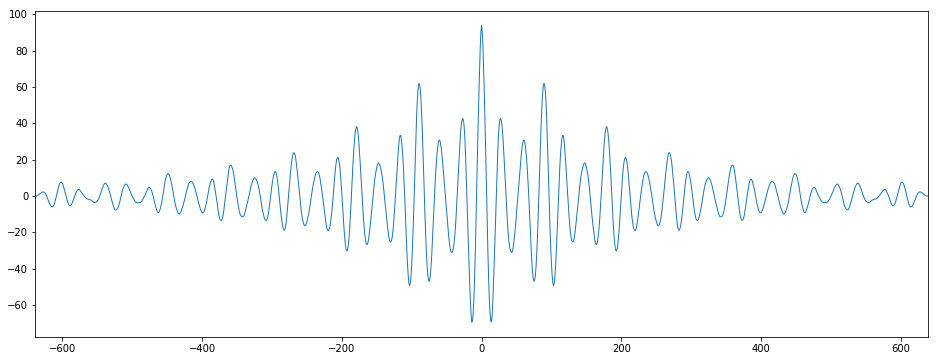

In [5]:
frame = frame.astype(np.float)
frame -= frame.mean()
amax = np.abs(frame).max()
frame /= amax
xlim(-(frame_length-1), frame_length-1)
bcorr = correlate(frame, frame)
plot(range(-(frame_length-1), frame_length), bcorr, linewidth=1.0)
title("The complete autocorrelation")

Text(0.5,1,'The autocorrelation for nonnegative indexes')

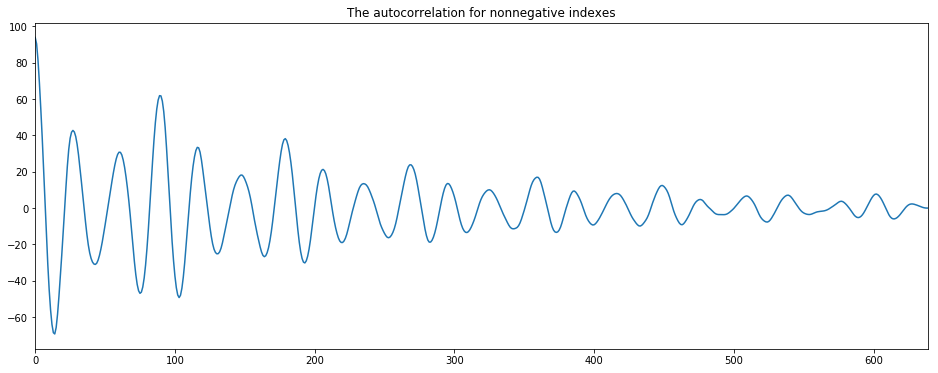

In [11]:
# keep the positive indexes of the autocorrelation
corr = bcorr[len(bcorr)//2:]
xlim(0, frame_length-1)
plot(corr)
title("The autocorrelation for nonnegative indexes")

### Caculate the first difference using [numpy.diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) ###

Text(0.5,1,'The first difference of the autocorrelation (corr[n+1] - corr[n])')

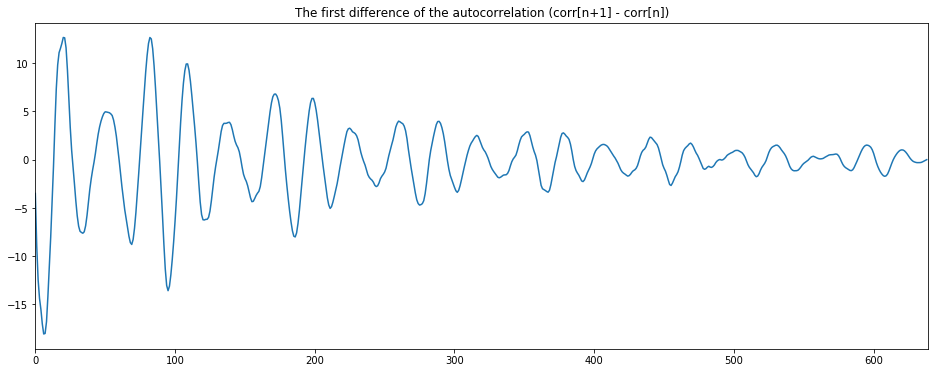

In [14]:
# Find the first minimum
dcorr = np.diff(corr)
xlim(0, len(dcorr))
plot(dcorr)
title("The first difference of the autocorrelation (corr[n+1] - corr[n])")

### Find the index of the first sample with positive difference using [numpy.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) ###

Text(0.5,1,'Autocorrelation without the initial values up to the first minimum')

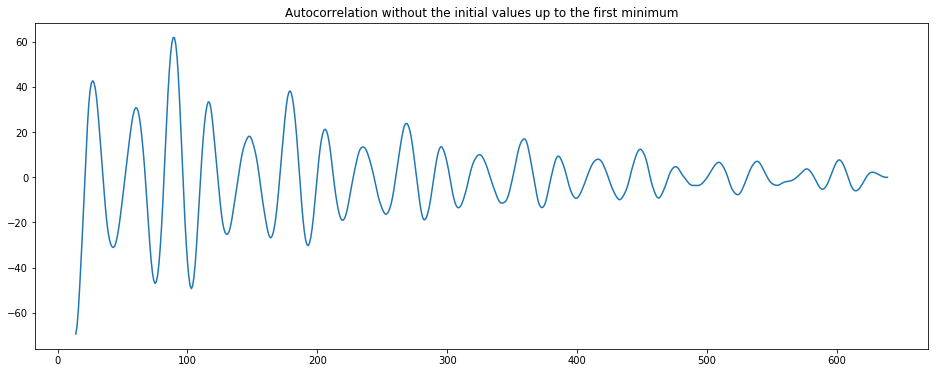

In [15]:
# Find the first minimum
rmin = np.where(dcorr > 0)[0]
if len(rmin) > 0:
    rmin1 = rmin[0]
plot(range(rmin1,len(corr)), corr[rmin1:])
title("Autocorrelation without the initial values up to the first minimum")

### Find the index of the sample with the maximum value using [numpy.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) ###

In [9]:
# Find the next peak
peak = np.argmax(corr[rmin1:]) + rmin1
rmax = corr[peak]/corr[0]
f0 = sfreq / peak

In [10]:
print("corr[peak]/corr[0] = {:.1f}".format(rmax))
print("Pitch frequency = {:.1f} Hz".format(f0))
print("Pitch period {:.1f} ms ({:d} samples)".format((1/f0)*1000, peak))

corr[peak]/corr[0] = 0.7
Pitch frequency = 224.7 Hz
Pitch period 4.5 ms (89 samples)
